# Read data from corresponding csv

In [693]:
import pandas as pd
import ast

csv_file_path = "estate_exports/estates_export_2023-11-25_180209.csv"
# Laden Daten wie vorher definiert
df = pd.read_csv(csv_file_path)



# Drop duplicates

In [694]:
# Entfernen von Duplikaten basierend auf der 'gok' Spalte
df = df.drop_duplicates(subset='gok', keep='first')

In [695]:
df.columns

Index(['id', 'gok', 'postcode', 'city', 'estate_types', 'estate_subtypes',
       'distribution_type', 'purchase_price_min', 'purchase_price_max',
       'square_meter_price_min', 'square_meter_price_max',
       'plot_area_size_min', 'plot_area_size_max', 'living_area_size_min',
       'living_area_size_max', 'rooms_min', 'rooms_max', 'construction_year',
       'is_new', 'features', 'created_at', 'updated_at'],
      dtype='object')

# Import statements

In [696]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop unneccessary columns (duplicates)

In [697]:
df = df.drop(
    [
        "id",
        "gok", 
        "square_meter_price_min", 
        "square_meter_price_max", 
        "purchase_price_min", 
        "distribution_type", 
        "plot_area_size_min", 
        "living_area_size_min",
        "created_at",
        "updated_at",
        "rooms_min",
        # "city",
        # "postcode",
    ], 
    axis = 1
)

In [698]:
df.columns

Index(['postcode', 'city', 'estate_types', 'estate_subtypes',
       'purchase_price_max', 'plot_area_size_max', 'living_area_size_max',
       'rooms_max', 'construction_year', 'is_new', 'features'],
      dtype='object')

# Convert array features such as estate_types and subtypes

In [700]:
# FEATURES Umwandlung
# ast.literal_eval macht aus einem String, der einer Python-Liste ähnelt, eine echte Liste
df['features'] = df['features'].apply(ast.literal_eval)

# Ermitteln aller einzigartigen Features
unique_features = set(feature for sublist in df['features'] for feature in sublist)

# Für jedes Feature eine neue Spalte hinzufügen
for feature in unique_features:
    df['feature_' + feature.lower()] = df['features'].apply(lambda x: feature in x)

# ESTATE TYPES Umwandlung
df['estate_types'] = df['estate_types'].apply(ast.literal_eval)

# Ermitteln aller einzigartigen Estate Types
unique_estate_types = set(estate_type for sublist in df['estate_types'] for estate_type in sublist)

# Für jeden Estate Type eine neue Spalte hinzufügen
for estate_type in unique_estate_types:
    df['estate_type_' + estate_type.lower()] = df['estate_types'].apply(lambda x: estate_type in x)

# ESTATE SUBTYPES Umwandlung
# Überprüfen ob die Spalte zu interpretierende Daten enthält
# Wenn nicht, setzen wir einen leeren Liste
df['estate_subtypes'] = df['estate_subtypes'].apply(lambda x: ast.literal_eval(x) if x.startswith("[") else [])

# Ermitteln aller einzigartigen Estate Subtypes
unique_estate_subtypes = set(subtype for sublist in df['estate_subtypes'] for subtype in sublist)

# Für jeden Estate Subtype eine neue Spalte hinzufügen
for subtype in unique_estate_subtypes:
    # Sicherstellen, dass es tatsächlich Subtypen gibt, bevor eine neue Spalte erstellt wird
    if subtype:
        df['estate_subtype_' + subtype.lower()] = df['estate_subtypes'].apply(lambda x: subtype in x)
        
# Optional: Original 'features', 'estate_types', und 'estate_subtypes' Spalten entfernen
df = df.drop(columns=['features', 'estate_types', 'estate_subtypes'])

# Ergebnis anzeigen
df.head()

,postcode,city,purchase_price_max,plot_area_size_max,living_area_size_max,rooms_max,construction_year,is_new,feature_wheelchair_accessible,feature_fully_renovated,...,estate_subtype_farmhouse,estate_subtype_detached_house,estate_subtype_rustico,estate_subtype_semi_detached_house,estate_subtype_mid_terrace_house,estate_subtype_townhouse,estate_subtype_castle,estate_subtype_bungalow,estate_subtype_villa,estate_subtype_finca
0,33181,Bad Wünnenberg / Fürstenberg,349000.0,714.0,110.0,4.0,1992.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57627,Hachenburg,495000.0,625.0,180.0,6.0,1994.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
2,35075,Gladenbach,295000.0,594.0,170.0,5.0,1982.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,57580,Gebhardshain VG,355000.0,948.0,96.0,4.0,1959.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,59227,Ahlen,499000.0,989.0,200.0,9.0,1975.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False


# Write different types into jsons

In [707]:
import json

# Annahme: unique_estate_types ist eine Liste der eindeutigen Estate Types
# df ist dein Pandas DataFrame

# Konvertiere die Liste der eindeutigen Estate Types in eine JSON-fähige Liste
estate_types_list = list(unique_estate_types)

# Erstelle ein Dictionary, das die Estate Types enthält
estate_types_dict = {'estate_types': estate_types_list}

# Konvertiere das Dictionary in JSON
estate_types_json = json.dumps(estate_types_dict)

# Speichere das JSON in eine Datei
with open('fields/estate_types.json', 'w') as json_file:
    json_file.write(estate_types_json)
    
# Konvertiere die Liste der eindeutigen Estate Types in eine JSON-fähige Liste
subestate_types_list = list(unique_estate_subtypes)

# Erstelle ein Dictionary, das die Estate Types enthält
subestate_types_dict = {'estate_subtypes': subestate_types_list}

# Konvertiere das Dictionary in JSON
subestate_types_json = json.dumps(subestate_types_dict)

# Speichere das JSON in eine Datei
with open('fields/estate_subtypes.json', 'w') as json_file:
    json_file.write(subestate_types_json)
    

# Konvertiere die Liste der eindeutigen Estate Types in eine JSON-fähige Liste
unique_features_list = list(unique_features)

# Erstelle ein Dictionary, das die Estate Types enthält
unique_features_dict = {'estate_features': unique_features_list}

# Konvertiere das Dictionary in JSON
unique_features_json = json.dumps(unique_features_dict)

# Speichere das JSON in eine Datei
with open('fields/features.json', 'w') as json_file:
    json_file.write(unique_features_json)



In [701]:
df.columns

Index(['postcode', 'city', 'purchase_price_max', 'plot_area_size_max',
       'living_area_size_max', 'rooms_max', 'construction_year', 'is_new',
       'feature_wheelchair_accessible', 'feature_fully_renovated',
       'feature_partly_developed', 'feature_loggia',
       'feature_available_for_rent', 'feature_rented',
       'feature_flat_share_possible', 'feature_garden_part',
       'feature_cellar_share', 'feature_judicial_sale',
       'feature_new_building_project', 'feature_passenger_lift',
       'feature_car_park', 'feature_garage', 'feature_free_of_commission',
       'feature_air_conditioned', 'feature_partly_air_conditioned',
       'feature_fully_furnished', 'feature_terrace', 'feature_fully_developed',
       'feature_ground_floor', 'feature_fully_cellared',
       'feature_bath_with_tub', 'feature_carport', 'feature_barrier_free',
       'feature_underground_parking', 'feature_balcony', 'feature_projected',
       'feature_double_parker', 'feature_undeveloped', 'feature_

# Filter table for outliers

In [684]:
# Angenommen, df ist Ihr DataFrame
# Zeilen entfernen, wo 'purchase_price_max' gleich 0.0 ist.
df = df[df['purchase_price_max'] > 60000.0]

df = df[df['purchase_price_max'] < 4000000.0]


# Zeilen entfernen, wo 'purchase_price_max' gleich 0.0 ist.
df = df[df['construction_year'] > 0.0]
# Zeilen entfernen, wo 'purchase_price_max' gleich 0.0 ist.
df = df[df['living_area_size_max'] > 0.0]
# Zeilen entfernen, wo 'purchase_price_max' gleich 0.0 ist.
df = df[df['rooms_max'] > 0.0]

# Einen boolean Series erstellen, der True für Zeilen mit Integers der Länge 5 ist
length_five = df['postcode'].astype(str).str.len() == 5

# Entfernen der Zeilen, wo die 'int_column' nicht eine Länge von 5 hat
# und der neue DataFrame wird in 'df_filtered' gespeichert
df_filtered = df[length_five]


# Konvertieren Sie alle nicht-numerischen Werte in der Spalte 'postcode' zu NaN
df['postcode'] = pd.to_numeric(df['postcode'], errors='coerce')

# Entfernen Sie dann alle Zeilen mit NaN in der Spalte 'postcode'
df = df.dropna(subset=['postcode'])



In [685]:
df

,postcode,city,purchase_price_max,plot_area_size_max,living_area_size_max,rooms_max,construction_year,is_new,feature_wheelchair_accessible,feature_fully_renovated,...,estate_subtype_farmhouse,estate_subtype_detached_house,estate_subtype_rustico,estate_subtype_semi_detached_house,estate_subtype_mid_terrace_house,estate_subtype_townhouse,estate_subtype_castle,estate_subtype_bungalow,estate_subtype_villa,estate_subtype_finca
0,33181.0,Bad Wünnenberg / Fürstenberg,349000.0,714.0,110.0,4.0,1992.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57627.0,Hachenburg,495000.0,625.0,180.0,6.0,1994.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
2,35075.0,Gladenbach,295000.0,594.0,170.0,5.0,1982.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,57580.0,Gebhardshain VG,355000.0,948.0,96.0,4.0,1959.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,59227.0,Ahlen,499000.0,989.0,200.0,9.0,1975.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,48720.0,Rosendahl,379900.0,794.0,226.0,7.0,1986.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,56179.0,Vallendar,285000.0,538.0,128.0,5.0,1972.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
9997,47546.0,Kalkar,425000.0,207.0,120.0,5.0,1997.0,0,False,False,...,False,False,False,True,False,False,False,False,False,False
9998,56370.0,Attenhausen,360000.0,714.0,160.0,6.0,2000.0,0,False,False,...,False,True,False,False,False,False,False,False,False,False


# One Hot Encoding for different cities

In [686]:
# Zuerst konvertieren Sie die 'city' Spalte mit One-Hot-Encoding.
# Die 'city' Spalte bereinigen:
#df['city'] = df['city'].apply(lambda x: x.split(' ')[0])

# Wenn man einfach nur die leerstellen bei city wegnehmen will
# Angenommen, df ist Ihr DataFrame und 'city' ist der Name der Spalte, die Sie bearbeiten möchten:
df['city'] = df['city'].str.replace(' ', '_')
df['city'] = df['city'].str.replace('[', '')
df['city'] = df['city'].str.replace(']', '')
df['city'] = df['city'].str.replace('<', '')
df['city'] = df['city'].str.replace('>', '')


df_encoded = pd.get_dummies(df, columns=['city'])



In [709]:
## save all cities in json
# Speicher nur die Stadtspalten in einer Variablen
city_columns = [col for col in df_encoded.columns if col.startswith('city_')]

# Erstelle ein Dictionary aus der Liste der Stadtnamen
city_dict = {i: city_columns[i] for i in range(len(city_columns))}

# Speichere dieses Dictionary in einer JSON-Datei
with open('fields/city_list.json', 'w') as outfile:
    json.dump(city_dict, outfile)

In [687]:
# Jetzt trennen Sie die Features von der Zielvariable.
X = df_encoded.drop('purchase_price_max', axis=1)  # Angenommen 'target_column' ist der Name Ihrer Zielvariablen.
y = df_encoded['purchase_price_max']


In [708]:
df_encoded.columns

Index(['postcode', 'purchase_price_max', 'plot_area_size_max',
       'living_area_size_max', 'rooms_max', 'construction_year', 'is_new',
       'feature_wheelchair_accessible', 'feature_fully_renovated',
       'feature_partly_developed',
       ...
       'city_Zülpich_/_Sinzenich', 'city_im_vorderen_Westerwald',
       'city_meerbusch', 'city_neuss', 'city_Ötzingen_/_Sainerholz',
       'city_Übach-Palenberg', 'city_Übach-Palenberg_/_Boscheln',
       'city_Übach-Palenberg_/_Marienberg', 'city_Üxheim',
       'city_Üxheim_OT_Niederehe'],
      dtype='object', length=1482)

# View Data

In [688]:
df_encoded

,postcode,purchase_price_max,plot_area_size_max,living_area_size_max,rooms_max,construction_year,is_new,feature_wheelchair_accessible,feature_fully_renovated,feature_partly_developed,...,city_Zülpich_/_Sinzenich,city_im_vorderen_Westerwald,city_meerbusch,city_neuss,city_Ötzingen_/_Sainerholz,city_Übach-Palenberg,city_Übach-Palenberg_/_Boscheln,city_Übach-Palenberg_/_Marienberg,city_Üxheim,city_Üxheim_OT_Niederehe
0,33181.0,349000.0,714.0,110.0,4.0,1992.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57627.0,495000.0,625.0,180.0,6.0,1994.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,35075.0,295000.0,594.0,170.0,5.0,1982.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,57580.0,355000.0,948.0,96.0,4.0,1959.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,59227.0,499000.0,989.0,200.0,9.0,1975.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,48720.0,379900.0,794.0,226.0,7.0,1986.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,56179.0,285000.0,538.0,128.0,5.0,1972.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,47546.0,425000.0,207.0,120.0,5.0,1997.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,56370.0,360000.0,714.0,160.0,6.0,2000.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Hyperparameter Tuning

In [624]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Teilen der Daten in Trainings- und Testset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Parametergrid für die Gittersuche
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'gamma': [0, 0.1, 0.3],
#     'subsample': [0.5, 0.75, 1.0],
#     'colsample_bytree': [0.5, 0.75, 1.0],
#     'max_depth': [3, 7, 12]
# }

# # Initialisieren des XGBoost Regressors
# xgb_model = XGBRegressor()

# # Setup GridSearchCV oder RandomizedSearchCV
# # Hier nutzen wir RandomizedSearchCV für eine schnelle zufällige Suche über den Parameterraum
# search = RandomizedSearchCV(xgb_model, param_grid, cv=3, n_iter=10, scoring='neg_mean_absolute_error', verbose=1, random_state=42, n_jobs=-1)
# # Für Gittersuche einfach folgende Zeile verwenden
# # search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

# # Durchführen der Suche
# search.fit(X_train, y_train)

# # Druckt die besten Parameter und die Beste Score
# print(f"Beste Parameter: {search.best_params_}")
# print(f"Bester Score: {-search.best_score_}")

# # Auswahl des besten Modells
# best_model = search.best_estimator_

# # Vorhersagen mit dem Testset treffen
# y_pred = best_model.predict(X_test)

# # Sicherstellen, dass keine negativen Vorhersagen gemacht werden
# y_pred = np.maximum(0, y_pred)

# # Bewertung des Modells
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Absolute Error: {mae}")
# print(f"Mean Squared Error: {mse}")
# print(f"R² Score: {r2}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Beste Parameter: {'subsample': 0.75, 'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}
Bester Score: 119313.10958890845
Mean Absolute Error: 105185.60545403525
Mean Squared Error: 42541288617.615395
R² Score: 0.7158327917915346


# Train Model with xgboost and parameters that were the best after hyperparameter tuning

In [689]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Teilen der Daten in Trainings- und Testset (nehmen wir an, dass dies schon vorprozessierte Daten sind)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisieren des XGBoost Regressors
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, gamma=0.1, subsample=0.75, colsample_bytree=0.5, max_depth=12)

# Trainieren des Modells
xgb_model.fit(X_train, y_train)

# Vorhersagen mit dem Testset treffen
y_pred = xgb_model.predict(X_test)

# Sicherstellen, dass keine negativen Vorhersagen gemacht werden
y_pred = np.maximum(0, y_pred)

# Evaluate results

Mean Absolute Error (MAE): 104376.91
Mean Squared Error (MSE): 34603950643.40
Root Mean Squared Error (RMSE): 186021.37
R-squared (R2): 0.7343


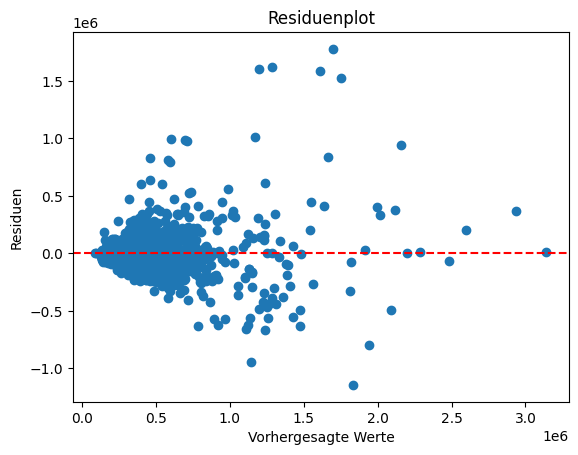

In [690]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Auswertungsmetriken berechnen
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # set squared=False to get the RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.4f}')

# Optional: Residuen plotten
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuenplot')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [691]:
y_pred

array([375204.1 , 526081.25, 283677.5 , ..., 230494.73, 185954.89,
       641919.3 ], dtype=float32)

# Reevaluate results

In [675]:
# Vorhersagen treffen und negative Vorhersagen eliminieren
y_pred = xgb_model.predict(X_test)
y_pred = np.maximum(0, y_pred)

# Erzeugen eines DataFrame zur Analyse der Vorhersagen
y_test = y_test.reset_index(drop=True) # Index zurücksetzen, wenn y_test noch den alten Index hat
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': y_test - y_pred
})

# Anzeigen der ersten paar Zeilen des DataFrame
predictions_df.head(200)

,Actual,Predicted,Residual
0,359000.0,3.624616e+05,-3461.562500
1,476000.0,4.643323e+05,11667.656250
2,289900.0,2.429817e+05,46918.312500
3,549900.0,5.581456e+05,-8245.562500
4,459000.0,4.576559e+05,1344.125000
...,...,...,...
195,282800.0,2.732302e+05,9569.812500
196,900000.0,1.255228e+06,-355228.250000
197,115000.0,1.881297e+05,-73129.656250
198,498000.0,4.146215e+05,83378.500000


# Save Model

In [702]:
from joblib import dump, load

# Modell abspeichern
dump(xgb_model, 'xgb_model.joblib')



['xgb_model.joblib']